In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from shapely.geometry import Polygon, LineString
from shapely.geometry import Point
# from junctionart.junctions import Geometry

In [3]:
with open("_roundabout3ways_V3.pickle", 'rb') as r3:
    r3s = pickle.load(r3)
    print(type(r3s))

<class 'list'>


In [ ]:
for rb in r3s:
    sum = 0
    for circularRoad in rb.circularRoads:
        sum += circularRoad.length()
    
    print(sum, 2*np.pi*rb.radius)

In [ ]:
df = pd.DataFrame(columns = ['totalCircularLength', 'Apparent Circumferance', 'circular irregularity ratio', 'radius', 'Max Incident Angle', 'Min Incident Angle'])

In [ ]:
for i, rb in enumerate(r3s):
    sum = 0
    for circularRoad in rb.circularRoads:
        sum += circularRoad.length()
    apparent_sum = 2*np.pi*rb.radius
    offsetsInRadians = [np.abs(offset * np.pi / 2) for offset in rb.offsets]
    offsetsInDegress = np.degrees(offsetsInRadians)
    df.loc[i] = [sum, apparent_sum, sum / apparent_sum, rb.radius, np.max(offsetsInDegress), min(offsetsInDegress)]

In [ ]:
df

In [ ]:
r3s[0].circularRoads[0].planview._raw_geometries[0].get_attributes()

In [ ]:
# roundabout = r3s[15]
x = []
y = []
radius = []
fig, ax = plt.subplots(figsize = (10,2))
for i, roundabout in enumerate(r3s):
    k = []
    print(i)
    for circularRoad in roundabout.circularRoads:
        xstart, ystart, hstart = circularRoad.planview.get_end_point() 
        xend, yend, hend = circularRoad.planview.get_end_point()
        print(xstart, ystart, ' | ', xend, yend , ' | ')

        k.append(math.sqrt((roundabout.center.x - xstart) ** 2 + (roundabout.center.y - ystart)**2))
    #     print((roundabout.center.x - xend) ** 2 + (roundabout.center.y - yend)**2)
    df_temp = pd.DataFrame(k)

#     ax = df_temp.plot(kind = "hist", density = True, bins = 15) 
    if(roundabout.radius > 30 and roundabout.radius < 50):
        ax = df_temp.plot(kind = "kde", ax = ax , legend=False, title="Distribution of radius in several 3 way Roundabouts")
    

In [ ]:
fig.savefig('3waysWithLessRadius')

In [8]:
x = []
y = []
rid = []
radius = []
for i, roundabout in enumerate(r3s):
#     if roundabout.radius > 30:
#         continue
    for circularRoad in roundabout.circularRoads:
        xstart, ystart, hstart = circularRoad.planview.get_end_point() 
        xend, yend, hend = circularRoad.planview.get_end_point()
        x.append(xstart)
        y.append(ystart)
        rid.append(i) 
        radius.append(math.sqrt((roundabout.center.x - xstart) ** 2 + (roundabout.center.y - ystart)**2))
data = {"id":rid, "x":x, "y":y, "Radius":radius}    
data = pd.DataFrame(data)

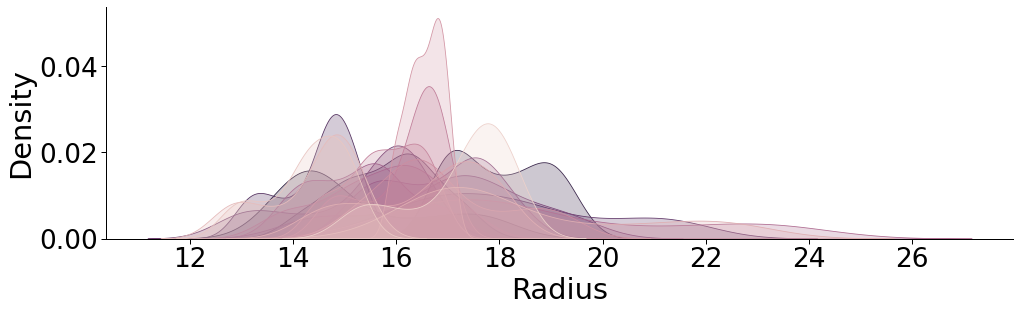

In [10]:
sns.set_context("paper", font_scale=3)

g = sns.displot(data, x="Radius", kind="kde", hue="id", fill=True, aspect = 3)
# g.ax.set_xlim(14,18)
g._legend.remove()
# plt.savefig('3wayFixedFinal.png')

In [ ]:
# roundabout = r3s[1]
fig, ax = plt.subplots(figsize = (10,2))
for j, roundabout in enumerate(r3s):
    if(roundabout.radius > 30 and roundabout.radius < 50):
        continue
    k = []
    x = []
    y = []
    for circularRoad in roundabout.circularRoads:
        xstart, ystart, hstart = circularRoad.planview.get_end_point() 
        xend, yend, hend = circularRoad.planview.get_end_point()

        x.append(xend)
        y.append(yend)
        k.append(math.sqrt((roundabout.center.x - xstart) ** 2 + (roundabout.center.y - ystart)**2))
    #     print((roundabout.center.x - xend) ** 2 + (roundabout.center.y - yend)**2)
    # df_temp = pd.DataFrame(k)

    #     ax = df_temp.plot(kind = "hist", density = True, bins = 15) 
    drdp = []
    for i in range(len(k) - 2):
        try:
            drdp.append( (k[i + 1] - k[i]) / math.dist((x[i+1], y[i+1]), (x[i], y[i])) )
        except ZeroDivisionError:
            print(i, roundabout.radius, math.dist((x[i+1], y[i+1]), (x[i], y[i])))

    df_temp = pd.DataFrame(drdp)
    ax = df_temp.plot(kind = "kde", ax=ax, legend=False, title="Distribution of dr/dDistance in a 3way Roundabout")

In [ ]:
fig.savefig('3waysDerivative')

In [12]:
ids = []
dr = []
radius = []
for j, roundabout in enumerate(r3s):
#     if(roundabout.radius > 30 ):
#         continue
    k = []
    x = []
    y = []
    for circularRoad in roundabout.circularRoads:
        xstart, ystart, hstart = circularRoad.planview.get_end_point() 
        xend, yend, hend = circularRoad.planview.get_end_point()

        x.append(xend)
        y.append(yend)
        k.append(math.sqrt((roundabout.center.x - xstart) ** 2 + (roundabout.center.y - ystart)**2))
    #     print((roundabout.center.x - xend) ** 2 + (roundabout.center.y - yend)**2)
    # df_temp = pd.DataFrame(k)

    #     ax = df_temp.plot(kind = "hist", density = True, bins = 15) 
    drdp = []
    for i in range(len(k) - 2):
        try:
            drdp.append( (k[i + 1] - k[i]) / math.dist((x[i+1], y[i+1]), (x[i], y[i])) )
            ids.append(j)
            dr.append((k[i + 1] - k[i]) / math.dist((x[i+1], y[i+1]), (x[i], y[i])))
            radius.append(k[i])
            
        except ZeroDivisionError:
            print(i, roundabout.radius, math.dist((x[i+1], y[i+1]), (x[i], y[i])))

data = {"ID" : ids, "dRadius/dDistance" : dr, "Radius": radius}
data = pd.DataFrame(data)

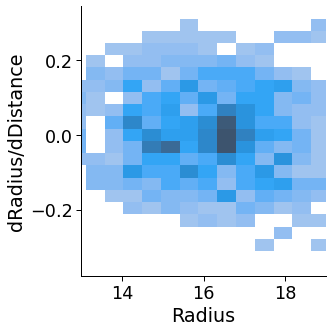

In [18]:
sns.set_context("paper", font_scale=2)
# g = sns.displot(data, x="dRadius/dDistance", kind="kde", hue="ID", fill=True, aspect = 2)
# g._legend.remove()
g=sns.displot(data, x="Radius", y = "dRadius/dDistance", aspect = 1)
g.ax.set_xlim(13,19)
# data

plt.savefig('3wayRadiusVsDerivative.png')

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
for i, roundabout in enumerate(r3s):
    k = []
    x = []
    y = []
    for circularRoad in roundabout.circularRoads:
        xstart, ystart, hstart = circularRoad.planview.get_end_point() 
        xend, yend, hend = circularRoad.planview.get_end_point()

        x.append(xend)
        y.append(yend)
        k.append(math.sqrt((roundabout.center.x - xstart) ** 2 + (roundabout.center.y - ystart)**2))
        df_xy = pd.DataFrame()
        df_xy['x'] = x
        df_xy['y'] = y
    # ax = df_temp.plot(kind = "kde", ax=ax, legend=False, title="Distribution of dr/dDistance in a 3way Roundabout")
    df_xy.x = (df_xy.x - df_xy.x.mean(0)) / df_xy.x.std(0)
    df_xy.y = (df_xy.y - df_xy.y.mean(0)) / df_xy.y.std(0)
    points = [(p.x, p.y) for p in df_xy.iloc]
    polygon = Polygon(points)
    ax.plot(*polygon.exterior.xy)


sampleCircle = Point(0,0).buffer(1.3)
ax.plot(*sampleCircle.exterior.xy, color='black', linewidth=5)
# ax.set_title('Regular Circle vs Created Roundabouts (Normalized)')

In [ ]:
fig.savefig('CirclevsRoundaboutBetter')

In [ ]:
asf= LineString([(1, 2), (12, 12), (-4, 1), (35, 1)]).interpolate(1)

In [ ]:
# ax.plot(*polygon.exterior.xy)
for point in polygon.coords:
    print(point)

In [ ]:
def get_coeffs(road):
    coeffs = np.zeros((4, 2))
#     print("start s ", road.planview._adjusted_geometries[0].s)
    coeffs[0][0] = road.planview._adjusted_geometries[0].geom_type.au
    coeffs[1][0] = road.planview._adjusted_geometries[0].geom_type.bu
    coeffs[2][0] = road.planview._adjusted_geometries[0].geom_type.cu
    coeffs[3][0] = road.planview._adjusted_geometries[0].geom_type.du
    coeffs[0][1] = road.planview._adjusted_geometries[0].geom_type.av
    coeffs[1][1] = road.planview._adjusted_geometries[0].geom_type.bv
    coeffs[2][1] = road.planview._adjusted_geometries[0].geom_type.cv
    coeffs[3][1] = road.planview._adjusted_geometries[0].geom_type.dv
    return coeffs

In [ ]:
get_coeffs(r3s[0].circularRoads[0])
Geometry.Geometry.evalPoly()

In [ ]:
s = np.linspace(0, 1, 10)
coeffs = get_coeffs(r3s[0].circularRoads[0])
points = Geometry.Geometry.evalPoly(coeffs.copy(), s)

In [ ]:
points

In [ ]:
coeffs

In [ ]:
s

In [ ]:
vals = []
for k in s :
    val = coeffs[0] + k * coeffs[1] + k*k*coeffs[2] + k*k*k*coeffs[3]
    vals.append(val)

In [ ]:
vals = np.array(vals)

In [ ]:
def get_points(road):
    s = np.linspace(0, 1, 10)
    coeffs = get_coeffs(road)
#     print(coeffs)
    vals = []
    for k in s :
        val = coeffs[0] + k * coeffs[1] + k*k*coeffs[2] + k*k*k*coeffs[3]
        vals.append(val)
       
    x = road.planview._adjusted_geometries[0].x
    y = road.planview._adjusted_geometries[0].y
    hdg = road.planview._adjusted_geometries[0].heading
    points = []
    for a_ in vals:
        u, v = a_
        beta = hdg + np.arctan(v / u) if u != 0 else hdg
        x_ = x + np.sqrt(u*u + v*v) * np.cos(beta)
        y_ = y + np.sqrt(u*u + v*v) * np.sin(beta)
        points.append((x_, y_))
    return points

In [ ]:
a = get_points(r3s[0].circularRoads[0])
x = r3s[0].circularRoads[0].planview._adjusted_geometries[0].x
y = r3s[0].circularRoads[0].planview._adjusted_geometries[0].y
hdg = r3s[0].circularRoads[0].planview._adjusted_geometries[0].heading

In [ ]:
for a_ in a:
    u, v = a_
    beta = hdg + np.arctan(v / u) if u != 0 else hdg
    x_ = x + np.sqrt(u*u + v*v) * np.cos(beta)
    y_ = y + np.sqrt(u*u + v*v) * np.sin(beta)
    print(x_, y_)

In [ ]:
for r in r3s[0].circularRoads:
    for t, l in (get_points(r)):
        print(t, l)

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
totRad = 0
for i, roundabout in enumerate(r3s):
#     if(i > 0):
#         break
    k = []
    x = []
    y = []
    for circularRoad in roundabout.circularRoads:
        for x_, y_ in get_points(circularRoad):
            x.append(x_)
            y.append(y_)
#         k.append(math.sqrt((roundabout.center.x - x_) ** 2 + (roundabout.center.y - y_)**2))
        df_xy = pd.DataFrame()
        df_xy['x'] = x
        df_xy['y'] = y
    # ax = df_temp.plot(kind = "kde", ax=ax, legend=False, title="Distribution of dr/dDistance in a 3way Roundabout")
    df_xy.x = (df_xy.x - df_xy.x.mean(0)) / df_xy.x.std(0)
    df_xy.y = (df_xy.y - df_xy.y.mean(0)) / df_xy.y.std(0)
    df_xy['radius'] = (df_xy.x**2 + df_xy.y**2)
    totRad += df_xy.radius.mean(0)
#     points = [(p.x, p.y) for p in df_xy.iloc]
#     polygon = Polygon(points)
#     ax.plot(*polygon.exterior.xy)
    ax.plot(df_xy.x, df_xy.y)
avgRad = math.sqrt(totRad / len(r3s))
print(avgRad)
sampleCircle = Point(0,0).buffer(avgRad)
ax.plot(*sampleCircle.exterior.xy, color='black', linewidth=5)
ax.set_title('Regular Circle vs Created Roundabouts (Normalized)')

In [ ]:
fig.savefig('CirclevsRoundaboutBetter')

In [ ]:
def getOptimalCircle(incidentPoints):
        if len(incidentPoints) == 2:
            center = Point(
                (incidentPoints[0].x + incidentPoints[1].x) / 2,
                (incidentPoints[0].y + incidentPoints[1].y) / 2,
            )
            radius = self.__distance(incidentPoints[0], incidentPoints[1]) / 2
            return center, radius

        sum_x = (
            sum_y
        ) = sum_xx = sum_yy = sum_xy = sum_xxy = sum_xyy = sum_xxx = sum_yyy = 0.0
        A = B = C = D = E = 0.0
        x2 = y2 = xy = xDiff = yDiff = 0.0
        for incidentPoint in incidentPoints:
            sum_x += incidentPoint.x
            sum_y += incidentPoint.y
            x2 = incidentPoint.x * incidentPoint.x
            y2 = incidentPoint.y * incidentPoint.y
            xy = incidentPoint.x * incidentPoint.y
            sum_xx += x2
            sum_yy += y2
            sum_xy += xy
            sum_xxy += x2 * incidentPoint.y
            sum_xyy += y2 * incidentPoint.x
            sum_xxx += x2 * incidentPoint.x
            sum_yyy += y2 * incidentPoint.y

        n = len(incidentPoints)
        A = n * sum_xx - sum_x * sum_x
        B = n * sum_xy - sum_x * sum_y
        C = n * sum_yy - sum_y * sum_y  
        D = 0.5 * (n * (sum_xyy + sum_xxx) - sum_x * sum_yy - sum_x * sum_xx)
        E = 0.5 * (n * (sum_xxy + sum_yyy) - sum_y * sum_xx - sum_y * sum_yy)

        F = A * C - B * B
        centerX = (D * C - B * E) / F
        centerY = (A * E - B * D) / F


        radius = 10000000
        for i in range(n):
            xDiff = incidentPoints[i].x - centerX
            yDiff = incidentPoints[i].y - centerY
            radius = min(radius, (xDiff * xDiff + yDiff * yDiff) ** 0.5)


            return centerX, centerY, radius

In [ ]:
import random
def get_random_circle():
        radius = random.randint(5, 15) #50, 200 chhilo
        center_x = random.randint(0, 200)
        center_y = random.randint(0, 200)
        return center_x, center_y, radius
    
def get_random_point(center_x, center_y, radius):
        angle = random.random()*math.pi*2
        random_x = center_x + radius * math.cos(angle)
        random_y = center_y + radius * math.sin(angle)
        return random_x, random_y
    
def get_fixed_points(center_x, center_y, radius, nPoints):
        points = []
        for i in range(nPoints):
            x, y = get_random_point(center_x, center_y, radius)
            # modified_angle = angle + random.randint(-30, 30)
            # modified_x, modified_y = self.random_gradient_tranlation(modified_angle, x, y)
            points.append((x, y))
            
        return points

In [ ]:
class IncidentPoint:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [ ]:
c_x, c_y, r = get_random_circle()
points = get_fixed_points(c_x, c_y, r, 1111)
points = [IncidentPoint(p[0], p[1]) for p in points]
ans = getOptimalCircle(points)

In [ ]:
print(ans)
print(c_x, c_y, r)